<a href="https://colab.research.google.com/github/andreodeo/Oedoerdna/blob/main/Rain_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TUGAS MATA KULIAH BUSINESS INTELLIGENCE**#

**"PREPROCESSING DATASET FOR MODEL RAIN PREDICTION USING LSTM"**

1. Andreo Yustiantoro Anjaya		23.55.2523
2.	Zahid Mujaddid			23.55.2542
3.	Muhammad Yusuf Widiyanto		23.51.2488
4.	Novel Adil Dwijaksana		23.55.2548


#**A. PREPROCESSING DATASET**#

#1. Analisa Dataset#
   
   Untuk mengetahui struktur, karakteristik dan mendeteksi masalah data seperti missing value, outlier, dan duplikasi.

a. Load Dataset

In [1]:
# Impor library penting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Lokasi file dataset (sesuaikan dengan lokasi Anda)
file_path = '/content/drive/MyDrive/Dataset Rain/seattle weather Dataset.csv'

# Load dataset
df = pd.read_csv(file_path)

b. Inspeksi Awal

Untuk melihat struktur dan karakteristik data

In [3]:
# Inspeksi Awal
print("🔍 Informasi Dataset:")
print(df.info())
print("\n🔍 5 baris pertama Dataset:")
display(df.head())

🔍 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB
None

🔍 5 baris pertama Dataset:


,DATE,PRCP,TMAX,TMIN,RAIN
0,1/1/1948,0.47,51,42,True
1,1/2/1948,0.59,45,36,True
2,1/3/1948,0.42,45,35,True
3,1/4/1948,0.31,45,34,True
4,1/5/1948,0.17,45,32,True


c. Analisa statistik data

Untuk melihat distribusi data secara statistik untuk mendeteksi permasalahan data terutama menyangkut missing value, outlier dan keseimbangan kelas.


📊 Statistik Deskriptif:


,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


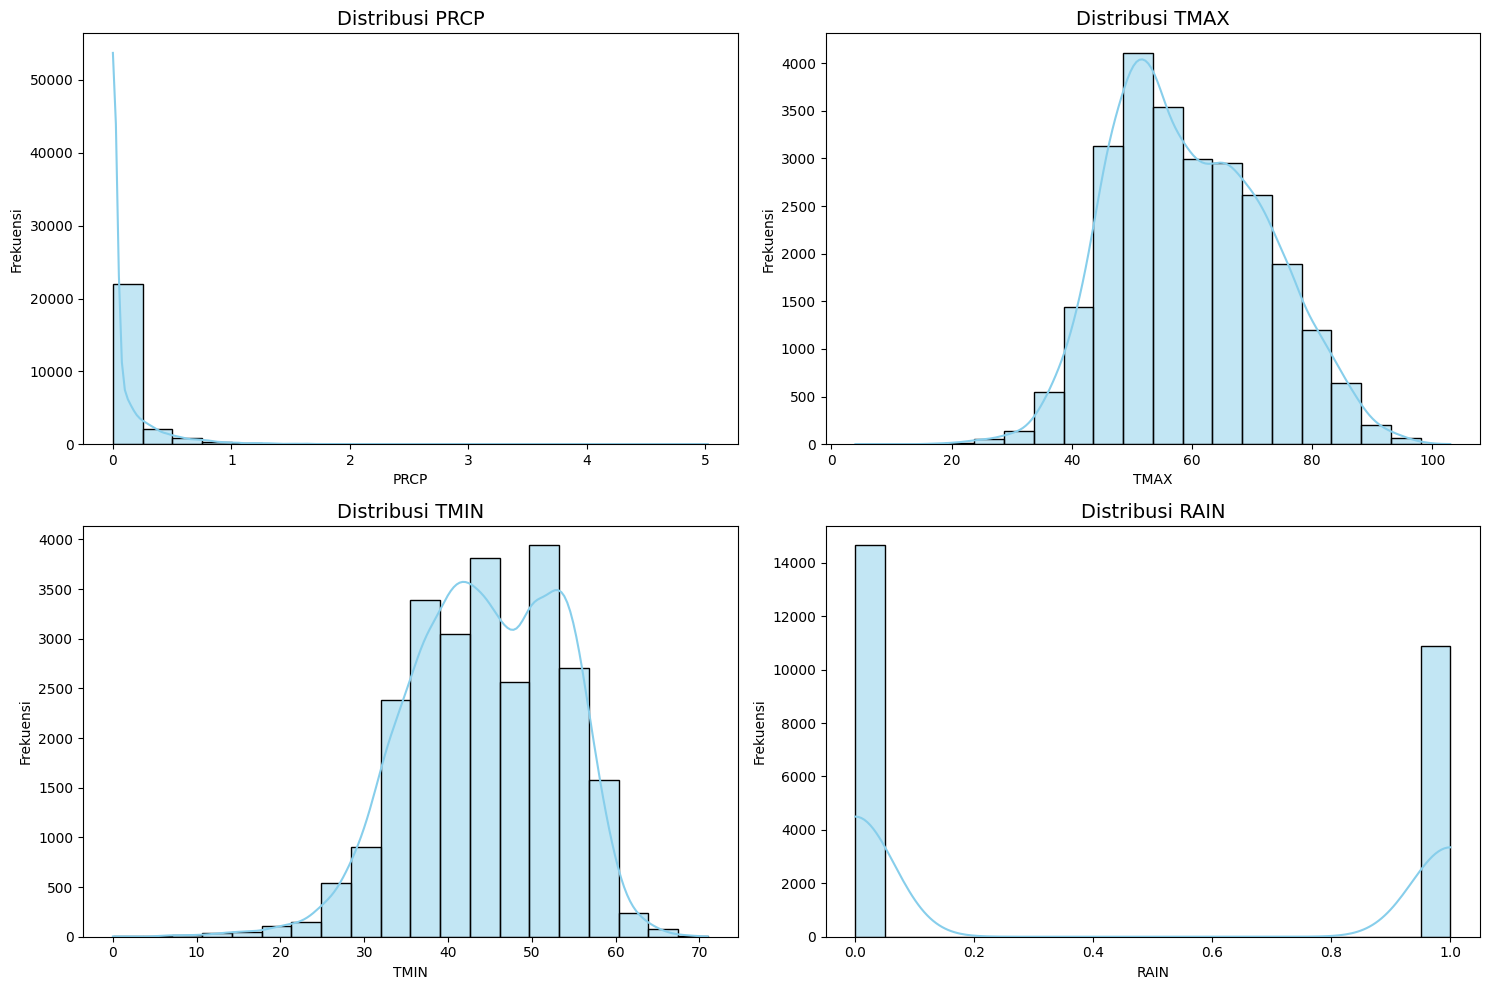

In [4]:
# Statistik Deskriptif
print("\n📊 Statistik Deskriptif:")
display(df[['PRCP', 'TMAX', 'TMIN', 'RAIN']].describe())

# Grafik distribusi dataset untuk PRCP, TMAX, TMIN, dan RAIN
import matplotlib.pyplot as plt
import seaborn as sns

fitur = ['PRCP', 'TMAX', 'TMIN', 'RAIN']

plt.figure(figsize=(15, 10))
for i, kolom in enumerate(fitur, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[kolom], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribusi {kolom}', fontsize=14)
    plt.xlabel(kolom)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Analisa :
1. Untuk Fitur PRCP, distribusi Skewed Positif nilai berkumpul disekitar 0, terdapat nilai maksimum 5.02 jauh dari distribusi dominan data, perlu dilakukan analisa lanjut untuk penanganan outlier.
2. Fitur Tmax terdistribusi mendekati normal
3. Fitur Tmin distribusi relatif normal
4. Fitur rain merupakan data binari dengan tipe kategorikal yang merupakan fitur target. Perlu dilakukan konversi ke numerik. Secara distribusi nilai target atau kelas hampir seimbang antara True & False.
5. Dari jumlah count data fitur PRCP memiliki jumlah yang tidak sama dengan dan lebih sedikit dibanding fitur TMax dan Tmin, hal tersebut mengindikasikan terdapat missing value pada fitur PRCP, sehingga perlu dilakukan penanganan missing value.


#2. Feature Encoding

a. Konversi format data fitur date ke format tanggal

agar data terurut secara kronologis dan dapat diproses untuk digunakan sebagai data time series untuk input model prediksi dengan LSTM.

In [5]:
# 🔍 Tampilkan tipe data sebelum konversi
print("\n📋 Tipe Data Sebelum Konversi:")
print(df.dtypes)

# Cek beberapa contoh isi kolom DATE
print("\n📅 Contoh Isi Kolom DATE Sebelum Konversi:")
print(df['DATE'].head())



📋 Tipe Data Sebelum Konversi:
DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

📅 Contoh Isi Kolom DATE Sebelum Konversi:
0    1/1/1948
1    1/2/1948
2    1/3/1948
3    1/4/1948
4    1/5/1948
Name: DATE, dtype: object


In [6]:
# Konversi kolom 'DATE' ke datetime dengan toleransi format
import pandas as pd
from dateutil import parser

def safe_parse(x):
    try:
        return parser.parse(x)
    except (ValueError, TypeError):
        return pd.NaT

# Terapkan fungsi parsing aman
df['DATE'] = df['DATE'].apply(safe_parse)

# 🔍 Tampilkan tipe data setelah konversi
print("\n📋 Tipe Data Setelah Konversi:")
print(df.dtypes)

# Cek beberapa contoh isi kolom DATE setelah konversi
print("\n📅 Contoh Isi Kolom DATE Setelah Konversi:")
print(df['DATE'].head())

# 🔍 Cek jika ada data 'DATE' yang gagal dikonversi
num_invalid = df['DATE'].isnull().sum()
if num_invalid > 0:
    print(f"\n⚠️ Terdapat {num_invalid} data yang gagal dikonversi menjadi datetime.")
else:
    print("\n✅ Semua data di kolom 'DATE' berhasil dikonversi ke datetime.")


📋 Tipe Data Setelah Konversi:
DATE    datetime64[ns]
PRCP           float64
TMAX             int64
TMIN             int64
RAIN            object
dtype: object

📅 Contoh Isi Kolom DATE Setelah Konversi:
0   1948-01-01
1   1948-01-02
2   1948-01-03
3   1948-01-04
4   1948-01-05
Name: DATE, dtype: datetime64[ns]

✅ Semua data di kolom 'DATE' berhasil dikonversi ke datetime.


Data berhasil di konvers dari tipe object (non numerik) ke tipe datetime dengan format yyyy-mm-dd

b. Konversi data Fitur Target (RAIN) dari kategorikal ke numerik.

Konversi dilakukan karena model prediksi hanya dapat memproses angka untuk perhitungan khususnya untuk fitur target yaitu menghitung error atau loss

In [7]:
# 🔍 Tampilkan tipe data dan nilai unik kolom 'RAIN' sebelum konversi
print("\n📋 Tipe Data Sebelum Konversi:")
print(df['RAIN'].dtype)

print("\n🌧️ Nilai Unik pada Kolom 'RAIN' Sebelum Konversi:")
print(df['RAIN'].unique())


📋 Tipe Data Sebelum Konversi:
object

🌧️ Nilai Unik pada Kolom 'RAIN' Sebelum Konversi:
[True False nan]


In [8]:
# Konversi RAIN ke numerik
# Jika RAIN masih boolean (True/False), map ke 1/0
# Kalau RAIN berupa teks ('Yes', 'No'), juga bisa map serupa
df['RAIN'] = df['RAIN'].map({True: 1, False: 0, 'Yes': 1, 'No': 0}).astype('Int64')

# 🔍 Tampilkan tipe data dan nilai unik kolom 'RAIN' setelah konversi
print("\n📋 Tipe Data Setelah Konversi:")
print(df['RAIN'].dtype)

print("\n🌧️ Nilai Unik pada Kolom 'RAIN' Setelah Konversi:")
print(df['RAIN'].unique())

# 🔍 Cek distribusi data setelah konversi
print("\n📊 Distribusi Data Setelah Konversi:")
print(df['RAIN'].value_counts())


📋 Tipe Data Setelah Konversi:
Int64

🌧️ Nilai Unik pada Kolom 'RAIN' Setelah Konversi:
<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64

📊 Distribusi Data Setelah Konversi:
RAIN
0    14648
1    10900
Name: count, dtype: Int64


Konversi data RAIN berhasil dilakukan dengan merubah nilai True = 1 dan False = 0. namun  terdapat data yang kosong NA, ditahap selanjutnya perlu dilakukan penanganan missing value

#3. Penanganan missing Value
Untuk mencegah hasil prediksi yang bias dan menghindari error pada pemrosesan data

In [9]:
# Tahap 1: Visualisasi Missing Value Sebelum Penanganan
# Total data
total_data = len(df)

# Hitung missing value per kolom
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / total_data) * 100

# Gabungkan hasil
missing_report = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
})

print(missing_report)
print(f"\nJumlah total missing value di dataset: {missing_counts.sum()} dari {total_data*len(df.columns)} data poin.")

      Missing Count  Missing Percentage (%)
DATE              0                0.000000
PRCP              3                0.011741
TMAX              0                0.000000
TMIN              0                0.000000
RAIN              3                0.011741

Jumlah total missing value di dataset: 6 dari 127755 data poin.


Jumlah data missing value relatif sangat rendah dibawah 1% dari total data keseluruhan sehingga dampaknya sangat kecil. Untuk teknik penanganan yaitu Hapus baris dengan missing value

In [10]:
# Hapus semua baris yang memiliki missing value
df = df.dropna().reset_index(drop=True)

print("\n📋 Kondisi Missing Value Setelah Penanganan:")

# Update total data setelah drop
total_data_after = len(df)

# Hitung kembali missing value per kolom
missing_counts_after = df.isnull().sum()
missing_percentage_after = (missing_counts_after / total_data_after) * 100

# Gabungkan hasil
missing_report_after = pd.DataFrame({
    'Missing Count': missing_counts_after,
    'Missing Percentage (%)': missing_percentage_after
})

print(missing_report_after)
print(f"\nJumlah total missing value di dataset setelah penanganan: {missing_counts_after.sum()} dari {total_data_after*len(df.columns)} data poin.")


📋 Kondisi Missing Value Setelah Penanganan:
      Missing Count  Missing Percentage (%)
DATE              0                     0.0
PRCP              0                     0.0
TMAX              0                     0.0
TMIN              0                     0.0
RAIN              0                     0.0

Jumlah total missing value di dataset setelah penanganan: 0 dari 127740 data poin.


#4. Deteksi dan Penanganan Outlier#

Outlier atau data yang signifikan berbeda dari distribusi data kebanyakan dapat mempengaruhi hasil secara drastis khususnya dalam model prediksi, oleh karena perlu dilakukan deteksi dan analisa hasil deteksi outlier untuk selanjutnya menentukan langkah penanganan outlier.

a. Deteksi Outlier

Metode yang digunakan adalah Interquartile range (IQR), metode ini dipilih karena lebih sesuai untuk distribusi data tidak normal (skewed) dimana terdapat fitur dengan data yang terdistribusi skewed positif yaitu PRCP, dan untuk TMIN dan TMAX meskipun distribusi cenderung normal namun sedikit skewed.


📋 Deteksi Outlier per Fitur:
PRCP: 3558 outliers (13.9267%)
TMAX: 24 outliers (0.0939%)
TMIN: 92 outliers (0.3601%)

🔍 Total baris mengandung outlier (gabungan semua fitur): 3658


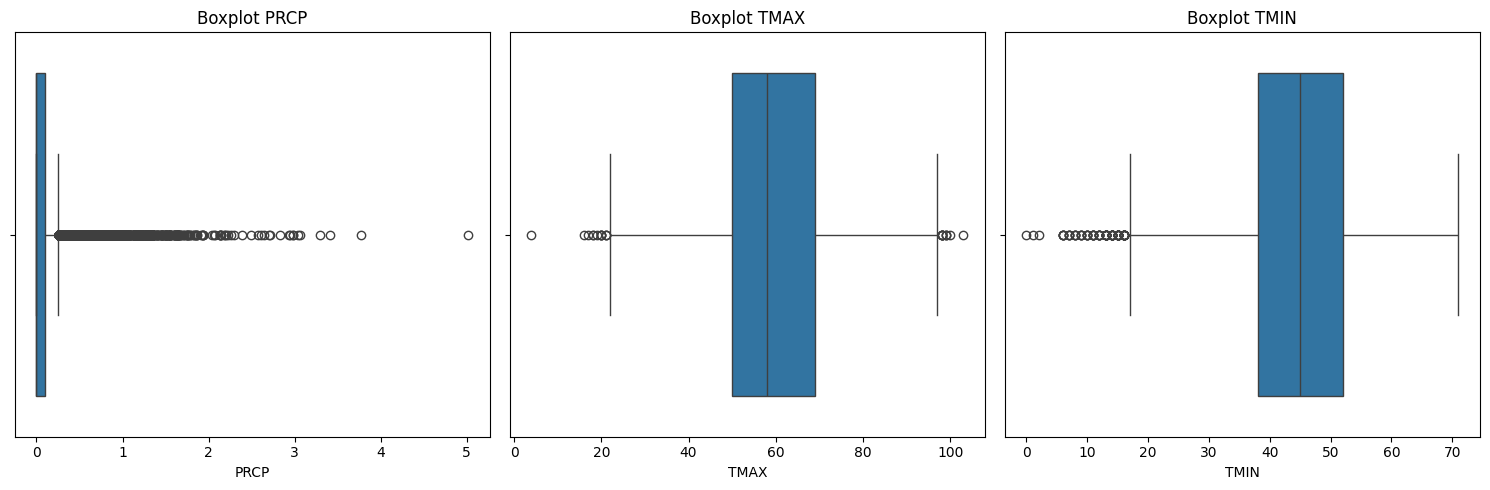

In [11]:
# Tahap 1: Deteksi Outlier (Menggunakan IQR)
# ==============================
# Pastikan kolom numerik
numerical_cols = ['PRCP', 'TMAX', 'TMIN']

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indexes = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
    return outlier_indexes

# Simpan index outlier semua fitur
outlier_indices = set()

print("\n📋 Deteksi Outlier per Fitur:")

for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(df))*100:.4f}%)")
    outlier_indices.update(outliers)

print(f"\n🔍 Total baris mengandung outlier (gabungan semua fitur): {len(outlier_indices)}")

# ==============================
# Tahap 2: Visualisasi Outlier
# ==============================

plt.figure(figsize=(15,5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Analisa Hasil deteksi Outlier :

1. Fitur PRCP, outlier sebesar 13.9% dengan distribusi skewed(ekor ke kanan), dikarenakan jumlah outlier cukup signifikan, menghapus data akan merusak distribusi asli dan mengurangi informasi penting seperti nilai-nilai tinggi yang mengindikasikan curah hujan ekstrem.Penanganan dengan menggunakan metode log transform untuk menangani skewed.

2. Fitur TMAX, outlier sangat kecil 0.09% kemungkinan data input yang keliru, penanganan dilakukan dengan menghapus data karena data cukup sedikit sehingga tidak mempengaruhi representasi distribusi.

3. Fitur TMIN, outlier sangat sedikit 0.36% kemungkinan data input yang keliru, penanganan dilakukan dengan menghapus data karena data cukup sedikit sehingga tidak mempengaruhi representasi distribusi.


b. Penanganan outlier


✅ Data setelah penghapusan outlier TMAX dan TMIN: 25444 baris


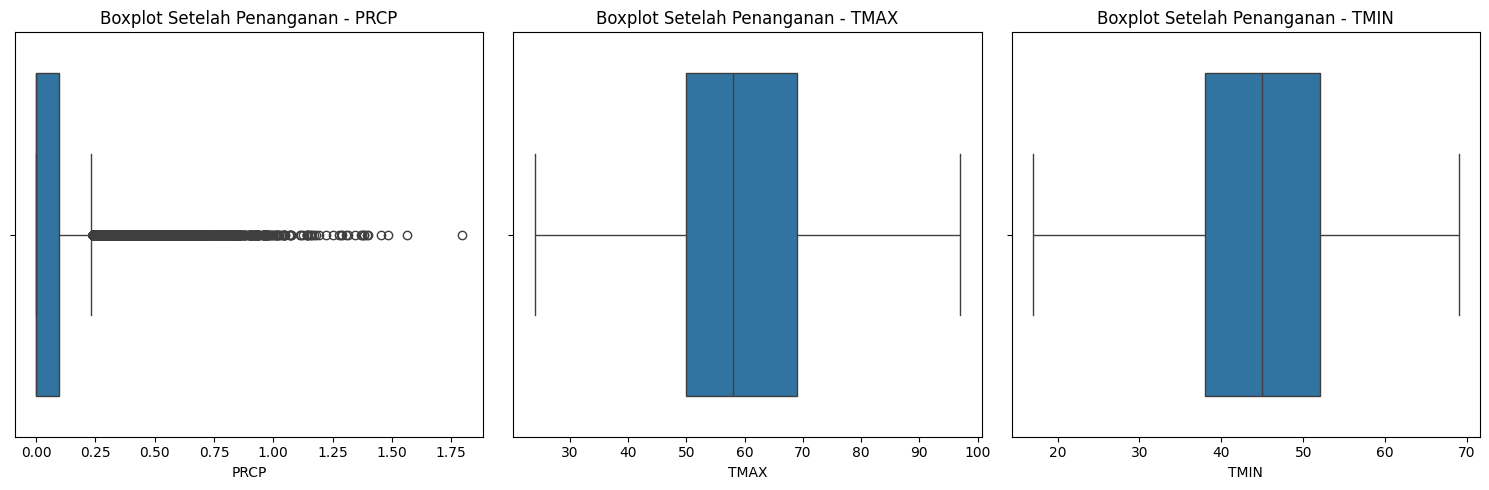

In [12]:
# Step 1: Penanganan Outlier
# ==============================

# 🔵 Untuk PRCP: lakukan log transform
df['PRCP'] = np.log1p(df['PRCP'])  # log(1 + PRCP) untuk menangani nilai 0

# 🔵 Untuk TMAX dan TMIN: hapus outlier
# 🔍 Deteksi outlier per fitur
outlier_indices_TMAX = detect_outliers_iqr(df, 'TMAX')  # <-- definisikan dulu
outlier_indices_TMIN = detect_outliers_iqr(df, 'TMIN')  # <-- definisikan juga


outlier_indices_to_drop = outlier_indices_TMAX.union(outlier_indices_TMIN)
df = df.drop(index=outlier_indices_to_drop, errors='ignore')
df = df.reset_index(drop=True)

print(f"\n✅ Data setelah penghapusan outlier TMAX dan TMIN: {len(df)} baris")


# Step 2: Visualisasi Distribusi Setelah Penanganan
# ==============================

plt.figure(figsize=(15,5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot Setelah Penanganan - {col}')
plt.tight_layout()
plt.show()

Hasil

1. PRCP : menunjukkan distribusi tetap skewed ke kanan meskipun sudah dikurangi dengan log transform. namun Skala PRCP maksimal di sekitar 1.0 sehingga Skew dan outlier tidak separah sebelum transformasi.

2. TMIN dan TMAX : outlier telah dihapus sehingga tidak terdapat outlier.

#5. Penambahan fitur bulan (sinyal siklikal) / Feature creation & Encoding

Penambahan fitur bulan dilakukan untuk melihat pengaruh musiman (bulan) dalam prediksi hujan pada model LSTM. (Skenario dengan dan tanpa fitur bulan )

In [13]:
# Step 1: Menambahkan Fitur Bulan (Sinyal Siklikal)
# ==============================

# Pastikan kolom DATE sudah bertipe datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Ekstrak bulan dari kolom DATE
df['Month'] = df['DATE'].dt.month

# Buat sinyal siklikal dari bulan
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# (Opsional) Drop kolom Month jika tidak mau dipakai
df = df.drop(columns=['Month'])

# ==============================
# Tampilkan Data Setelah Penambahan Fitur Bulan
# ==============================

print("\n✅ Data setelah penambahan fitur sinyal bulan (month_sin, month_cos):")
print(df.head())

# Menampilkan tipe data untuk memastikan semuanya benar
print("\n📋 Tipe data kolom:")
print(df.dtypes)



✅ Data setelah penambahan fitur sinyal bulan (month_sin, month_cos):
        DATE      PRCP  TMAX  TMIN  RAIN  month_sin  month_cos
0 1948-01-01  0.385262    51    42     1        0.5   0.866025
1 1948-01-02  0.463734    45    36     1        0.5   0.866025
2 1948-01-03  0.350657    45    35     1        0.5   0.866025
3 1948-01-04  0.270027    45    34     1        0.5   0.866025
4 1948-01-05  0.157004    45    32     1        0.5   0.866025

📋 Tipe data kolom:
DATE         datetime64[ns]
PRCP                float64
TMAX                  int64
TMIN                  int64
RAIN                  Int64
month_sin           float64
month_cos           float64
dtype: object


#6. Scaling

Scaling dilakukan agar nilai-nilai fitur numerik berada dalam rentang yang seragam. Sehingga model tidak bias dalam melakukan prediksi

Metode yang dipilih untuk scaling adalah MinMaxScaler, karena distribusi fitur sudah tidak terlalu skew dan LSTM cenderung lebih stabil jika input antara [0, 1]

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Fitur yang akan di-scale
features_for_scaling = ['PRCP', 'TMAX', 'TMIN', 'month_sin', 'month_cos']

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[features_for_scaling]),
    columns=features_for_scaling
)

# Gabungkan kembali dengan kolom target
df_scaled['RAIN'] = df['RAIN'].values

print("\n✅ Data setelah scaling:")
print(df_scaled.head())



✅ Data setelah scaling:
       PRCP      TMAX      TMIN  month_sin  month_cos  RAIN
0  0.214620  0.369863  0.480769       0.75   0.933013     1
1  0.258335  0.287671  0.365385       0.75   0.933013     1
2  0.195343  0.287671  0.346154       0.75   0.933013     1
3  0.150426  0.287671  0.326923       0.75   0.933013     1
4  0.087463  0.287671  0.288462       0.75   0.933013     1


#7. Keseimbangan data

Tahap ini untuk melihat dan penanganan menyangkut keseimbangan data, hal ini perlu dilakukan karena model prediksi sensitif terhadap data imbalance, selain itu untuk menentukan strategi training dan evaluasi


📋 Jumlah Data per Kelas:
RAIN
0    14566
1    10878
Name: count, dtype: Int64

📈 Persentase Data per Kelas:
RAIN
0    57.25
1    42.75
Name: proportion, dtype: Float64


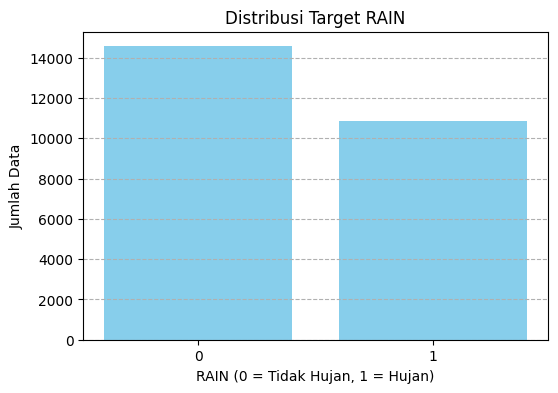

In [15]:
# Cek jumlah masing-masing kelas
target_counts = df_scaled['RAIN'].value_counts()
target_percent = df_scaled['RAIN'].value_counts(normalize=True) * 100

print("\n📋 Jumlah Data per Kelas:")
print(target_counts)

print("\n📈 Persentase Data per Kelas:")
print(target_percent.round(2))

# Visualisasi distribusi target
plt.figure(figsize=(6,4))
plt.bar(target_counts.index.astype(str), target_counts.values, color='skyblue')
plt.title('Distribusi Target RAIN')
plt.xlabel('RAIN (0 = Tidak Hujan, 1 = Hujan)')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', linestyle='--')
plt.show()

Dari hasil pemeriksaan kelas data, selisih antara kelas sekitar 14.5%, berdasarkan hasil tersebut kelas data masih cukup seimbang sehingga tidak perlu dilakukan penanganan data tidak seimbang

#8. Fitur Korelasi

Untuk melihat korelasi antara prediktor dan target (RAIN) serta korelasi antar fitur


📋 Korelasi Antar Fitur:
               PRCP      TMAX      TMIN  month_sin  month_cos      RAIN
PRCP       1.000000 -0.268730 -0.085049   0.087454   0.256195  0.595054
TMAX      -0.268730  1.000000  0.858208  -0.463352  -0.688924 -0.397910
TMIN      -0.085049  0.858208  1.000000  -0.529365  -0.612364 -0.148282
month_sin  0.087454 -0.463352 -0.529365   1.000000  -0.003737  0.171559
month_cos  0.256195 -0.688924 -0.612364  -0.003737   1.000000  0.257178
RAIN       0.595054 -0.397910 -0.148282   0.171559   0.257178  1.000000


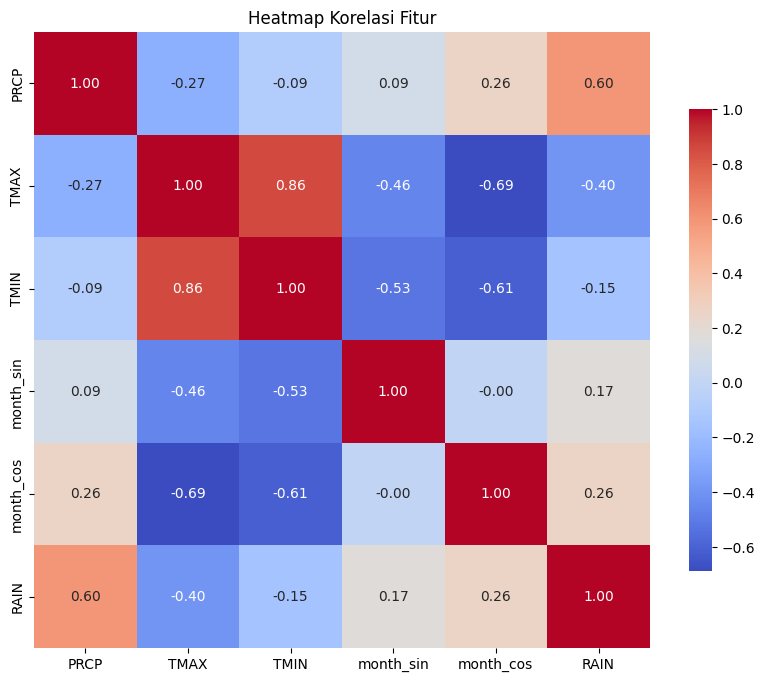

In [16]:

# Step: Hitung Korelasi
# ==========================
# Korelasi Pearson antar semua kolom numerik
correlation_matrix = df_scaled.corr()

print("\n📋 Korelasi Antar Fitur:")
print(correlation_matrix)


# Step: Visualisasi Heatmap Korelasi
# ==========================
plt.figure(figsize=(10,8))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .75}
)
plt.title('Heatmap Korelasi Fitur')
plt.show()


1. PRCP-RAIN : Korelasi kuat-Positif , Fitur terpenting untuk prediksi hujan.

2. TMAX-RAIN : Korelasi-Sedang Negatif, Fitur penting, tapi berlawanan arah (negatif terhadap hujan).

3. TMIN-RAIN : Korelasi Lemah-Negatif, Fitur tambahan, tidak dominan.

4. month_sin-RAIN & month_cos-RAIN : Korelasi Lemah-Positif, Membantu menangkap pola musiman, walau kontribusinya tidak dominan.

Dari hasil tersebut akan dibuat skenario prediksi dengan atau tanpa TMIN dan fitur bulan.

#B. MODEL LSTM

Dalam tugas ini,  model Long Short-Term Memory (LSTM) dipilih untuk membangun sistem prediksi hujan berbasis data historis cuaca.
Pemilihan LSTM didasarkan pada beberapa pertimbangan penting terkait karakteristik dataset dan kebutuhan analisis yaitu sifat data yang digunakan adalah time series dimana setiap data memiliki keterkaitan temporal, dan kemampuan LSTM menangani hubungan jangka panjang tidak hanya 1 hari namun dalam pola jangka panjang misalkan 7 hari dan 1 bulan.

Sliding window adalah teknik dalam data time-series yang membentuk pasangan input-output dengan mengambil sejumlah data historis sebagai dasar untuk memprediksi nilai ke depan.
Metode ini memungkinkan model, seperti LSTM, belajar dari pola waktu dalam data.

Dalam penelitian ini, dipilih ukuran window:

1. 7 hari untuk menangkap pola cuaca jangka pendek,

2. 14 hari untuk menangkap transisi perubahan cuaca,

3. 30 hari untuk mengenali pola musiman dan tren jangka panjang.

Pemilihan ini bertujuan mengeksplorasi seberapa jauh histori data memengaruhi akurasi prediksi hujan.

Model diuji dalam beberapa skenario sebagai berikut
1. Menggunakan Fitur Lengkap
2. Tanpa fitur TMIN
3. Tanpa Fitur month_sin dan month_cos
4. Tanpa fitur TMIN, month_sin dan month_cos


In [17]:
# Pastikan kolom 'DATE' ada di df_scaled
df_scaled['DATE'] = df['DATE'].values  # Ambil dari df asli

# Baru lakukan sort
df_scaled = df_scaled.sort_values('DATE').reset_index(drop=True)

print("\n✅ Data diurutkan berdasarkan kolom DATE.")

# ==========================
# Tampilkan Kolom df_scaled
# ==========================
print("\n📋 Kolom-kolom yang tersedia di df_scaled:")
print(df_scaled.columns.tolist())



✅ Data diurutkan berdasarkan kolom DATE.

📋 Kolom-kolom yang tersedia di df_scaled:
['PRCP', 'TMAX', 'TMIN', 'month_sin', 'month_cos', 'RAIN', 'DATE']


✅ CPU aktif.
Jumlah device: 1

🚀 Training dan Evaluasi untuk Full Features dengan window size 7 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🚀 Training dan Evaluasi untuk Full Features dengan window size 14 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🚀 Training dan Evaluasi untuk Full Features dengan window size 30 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🚀 Training dan Evaluasi untuk Without TMIN dengan window size 7 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🚀 Training dan Evaluasi untuk Without TMIN dengan window size 14 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🚀 Training dan Evaluasi untuk Without TMIN dengan window size 30 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🚀 Training dan Evaluasi untuk Without Month Features dengan window size 7 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🚀 Training dan Evaluasi untuk Without Month Features dengan window size 14 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🚀 Training dan Evaluasi untuk Without Month Features dengan window size 30 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

🚀 Training dan Evaluasi untuk Without TMIN and Month Features dengan window size 7 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🚀 Training dan Evaluasi untuk Without TMIN and Month Features dengan window size 14 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🚀 Training dan Evaluasi untuk Without TMIN and Month Features dengan window size 30 hari...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

📋 Tabel Matriks Evaluasi Lengkap:


,Scenario,Window Size (days),Accuracy,Precision,Recall,F1-Score
0,Full Features,7,0.711281,0.702906,0.587494,0.640039
1,Full Features,14,0.711365,0.717919,0.558956,0.628543
2,Full Features,30,0.706866,0.735180,0.513964,0.604984
3,Without TMIN,7,0.698703,0.713755,0.518219,0.600469
4,Without TMIN,14,0.702517,0.709392,0.540504,0.613538
5,Without TMIN,30,0.701161,0.700171,0.552252,0.617477
6,Without Month Features,7,0.707744,0.736504,0.515520,0.606510
7,Without Month Features,14,0.706056,0.711953,0.549505,0.620269
8,Without Month Features,30,0.710211,0.694430,0.600901,0.644289
9,Without TMIN and Month Features,7,0.693200,0.689576,0.541610,0.606702


<ipython-input-28-42d025cb7b3a>:155: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


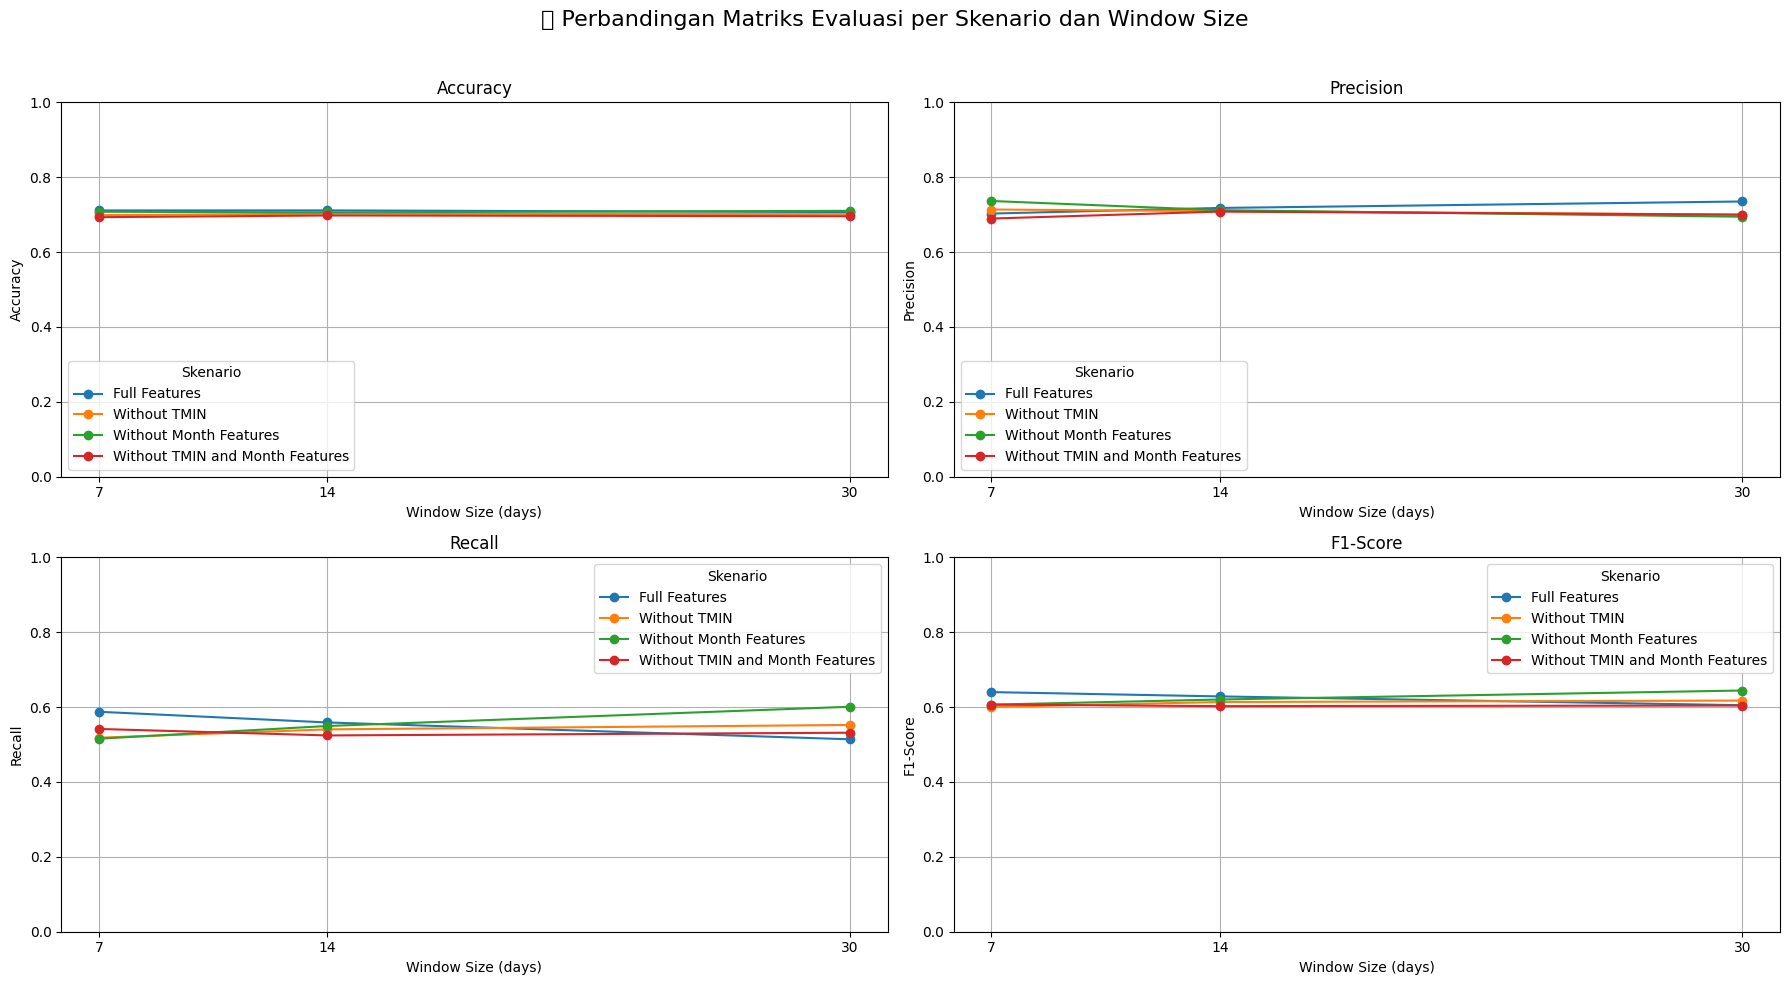

In [28]:
# ============================================
# Setup Runtime Environment
# ============================================

import os

try:
    import tensorflow as tf
except ModuleNotFoundError:
    print("🚀 TensorFlow belum ada, install dulu...")
    !pip install tensorflow
    import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Cek device aktif
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('✅ TPU aktif:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    gpus = tf.config.list_physical_devices('GPU')
    if len(gpus) > 0:
        print('✅ GPU aktif:', gpus)
        strategy = tf.distribute.MirroredStrategy()
    else:
        print('✅ CPU aktif.')
        strategy = tf.distribute.get_strategy()

print('Jumlah device:', strategy.num_replicas_in_sync)

# ============================================
# Setting Skenario dan Sliding Window
# ============================================

window_sizes = [7, 14, 30]  # Ukuran sliding window
scenarios = {
    'Full Features': ['PRCP', 'TMAX', 'TMIN', 'month_sin', 'month_cos'],
    'Without TMIN': ['PRCP', 'TMAX', 'month_sin', 'month_cos'],
    'Without Month Features': ['PRCP', 'TMAX', 'TMIN'],
    'Without TMIN and Month Features': ['PRCP', 'TMAX']
}

target_col = 'RAIN'

# ============================================
# Fungsi Membuat Sliding Window
# ============================================

def create_sliding_window(data, features, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].iloc[i:i+window_size].values)
        y.append(data[target].iloc[i + window_size])
    return np.array(X), np.array(y)

# ============================================
# Fungsi Membuat Model LSTM Sederhana
# ============================================

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ============================================
# Training dan Evaluasi Semua Skenario + Window Size
# ============================================

metrics_results = []

for scenario_name, feature_list in scenarios.items():
    for window_size in window_sizes:
        print(f"\n🚀 Training dan Evaluasi untuk {scenario_name} dengan window size {window_size} hari...")

        # Buat Sliding Window
        X, y = create_sliding_window(df_scaled, feature_list, target_col, window_size)

        # Split Train-Test (20% Test)
        split_index = int((1 - 0.2) * len(X))
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]

        # Build and Train Model
        with strategy.scope():
            model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
            model.fit(X_train, y_train, epochs=10, batch_size=32,
                      validation_data=(X_test, y_test), verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

        # Hitung Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Simpan hasil
        metrics_results.append({
            'Scenario': scenario_name,
            'Window Size (days)': window_size,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1
        })

# ============================================
# Buat Tabel Matriks Evaluasi
# ============================================

metrics_df = pd.DataFrame(metrics_results)

print("\n📋 Tabel Matriks Evaluasi Lengkap:")
display(metrics_df)

# ============================================
# Visualisasi Matriks Evaluasi
# ============================================

# Plot 4 subplots (1 untuk masing-masing metrik)
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('📊 Perbandingan Matriks Evaluasi per Skenario dan Window Size', fontsize=16)

# List of metrics dan axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
axes = axs.flatten()

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    for scenario in metrics_df['Scenario'].unique():
        subset = metrics_df[metrics_df['Scenario'] == scenario]
        ax.plot(subset['Window Size (days)'], subset[metric], marker='o', label=scenario)

    ax.set_title(metric)
    ax.set_xlabel('Window Size (days)')
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend(title='Skenario')
    ax.set_xticks(window_sizes)
    ax.set_ylim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
